In [2]:
import cmocean 
import cosima_cookbook as cc
import dask.distributed as dsk
import glob
import matplotlib.gridspec as gs
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import xarray as xr

import warnings # ignore these warnings
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning)

figdir = '/home/561/jn8053/g_e14/figures-tmp/easterlies-collaborative/'

clnt = dsk.Client()
clnt

Client Scheduler: tcp://127.0.0.1:38891 Dashboard: /proxy/43463/status,Cluster Workers: 7 Cores: 28 Memory: 250.00 GiB


In [54]:
session_ryf = cc.database.create_session()
experiment_ryf = '01deg_jra55v13_ryf9091'

In [55]:
vhrho = cc.querying.getvar(experiment_ryf, 'vhrho_nt', session_ryf, n=1)

In [56]:
vhrho

,Array,Chunk
Bytes,28.06 GiB,3.20 MiB
Shape,"(31, 75, 900, 3600)","(1, 7, 300, 400)"
Count,9208 Tasks,9207 Chunks
Type,float32,numpy.ndarray


In [3]:
path = glob.glob('transport*ctrl*')

In [4]:
path

['transport_across_topograd_ctrl2155.nc',
 'transport_across_topograd_ctrl2151.nc',
 'transport_across_topograd_ctrl2152.nc',
 'transport_across_topograd_ctrl2154.nc',
 'transport_across_topograd_ctrl2150.nc',
 'transport_across_topograd_ctrl2153.nc',
 'transport_across_topograd_ctrl2156.nc']

In [5]:
tr_cross_shelf = xr.open_mfdataset(path, concat_dim = 'time')

In [7]:
tr_cross_shelf = tr_cross_shelf['__xarray_dataarray_variable__']

In [53]:
tr_cross_shelf.sel(potrho = slice(1032.53, 1032.8))['potrho']

<xarray.DataArray 'potrho' (potrho: 2)>
array([1032.5625, 1032.6875])
Coordinates:
  * potrho   (potrho) float64 1.033e+03 1.033e+03
Attributes:
    long_name:       potential density
    units:           kg/m^3
    cartesian_axis:  Z
    positive:        down
    edges:           potrho_edges

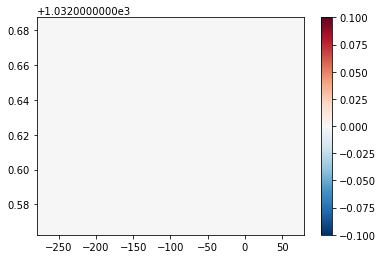

In [51]:
plt.pcolormesh(tr_cross_shelf['lon_along_contour'], tr_cross_shelf.sel(potrho = slice(1032.53, 1032.8))['potrho'], 
               tr_cross_shelf.mean('time').sel(potrho = slice(1032.53, 1032.8))/(1e6*1035), cmap = 'RdBu_r')
plt.colorbar()

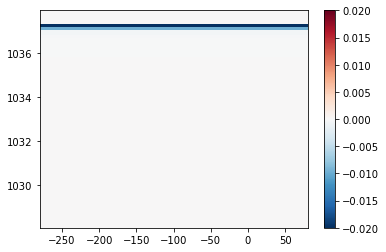

In [46]:
plt.pcolormesh(tr_cross_shelf['lon_along_contour'], tr_cross_shelf['potrho'], 
               tr_cross_shelf.mean('time')/(1e6*1035), vmin = -.02, vmax = .02, cmap = 'RdBu_r')
plt.colorbar()

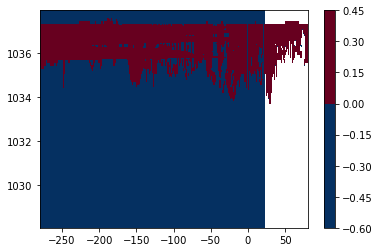

In [47]:
plt.contourf(tr_cross_shelf['lon_along_contour'], tr_cross_shelf['potrho'], 
               tr_cross_shelf.mean('time')/(1e6*1035), vmin = -.02, vmax = .02, cmap = 'RdBu_r')
plt.colorbar()

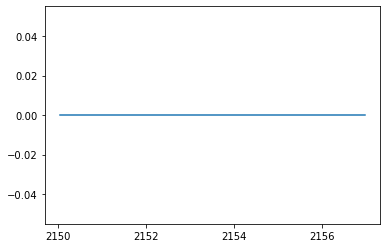

In [52]:
plt.plot(tr_cross_shelf['time'], tr_cross_shelf.sel(potrho = slice(1032.53, 1032.8)).sum('potrho').sum('lon_along_contour')/(1e6*1035))

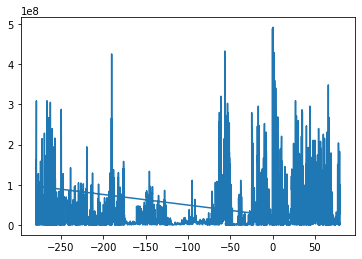

In [31]:
plt.plot(tr_cross_shelf['lon_along_contour'], tr_cross_shelf.where(tr_cross_shelf>0).sum('potrho').mean('time'))